In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split,StratifiedKFold,KFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


In [3]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [4]:
from sklearn.linear_model import LinearRegression,ElasticNet

In [5]:
train=pd.read_csv('train.csv')

In [6]:
train.head()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",351430.0,298.0,900.0,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,CA,2351.0
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,24.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",461508.0,74.0,314.0,Vice Ganda notices Bela Padilla's sudden chang...,CA,3264.0
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,SANDALWOOD REVIEWS,24.0,2018-03-26,"challenging star darshan latest news|""challeng...",40205.0,150.0,100.0,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,IN,580.0
3,22618,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10.0,2018-02-21,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",509726.0,847.0,4536.0,Hi hi hi! here's our vid on FLASHBACK's channe...,GB,82773.0
4,74074,MUMMY NE NI KEHTA - 2 FT. 102 NOT OUT| DUDE S...,Dude Seriously,23.0,2018-05-10,"dude|""seriously""|""friends""|""fun""|""gujarati""|""h...",74311.0,69.0,161.0,BOOK YOUR TICKETS HERE: https://goo.gl/QxdSyg...,IN,3557.0


In [7]:
test=pd.read_csv('test.csv')

In [8]:
test.head()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code
0,87185,జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...,CHIRRAVURI FOUNDATION,22.0,2018-01-17,"Chirravuri|""Foundation""|""chirravuri foundation...",80793.0,54.0,79.0,8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...,IN
1,9431,ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...,VIRAL IN INDIA,22.0,2017-11-18,"Raj Thackeray|""LIVE SPEECH""|""latest Speech""|""r...",150317.0,230.0,311.0,Don't Forget to SUBSCIRBE to our YouTube Chann...,IN
2,40599,"Thank you, Rider Nation!",Saskatchewan Roughriders,17.0,2017-12-01,"Roughriders|""Riders""|""CFL""|""Regina""|""Saskatche...",6558.0,10.0,7.0,"“To the devoted, the impassioned, the loyal:\n...",CA
3,494,Measuring RPM with a spectrum analyzer mobile app,Matthias Wandel,26.0,2018-02-06,"rpm|""woodworking""|""tool speed""|""blade speed""|""...",89664.0,145.0,324.0,Using a spectrum analyzer app to analyze the s...,US
4,73942,Anchor Anasuya responded on Phone breaking iss...,AVA Creative thoughts,22.0,2018-02-06,"anasuya responded|""anasuya issue""|""anasuya bor...",53526.0,357.0,153.0,Welcome to AVA Creative thoughts Channel Subsc...,IN


In [9]:
train.shape,test.shape

((26061, 12), (11170, 11))

In [10]:
ID_col,Target_col='video_id','likes'

In [11]:
features=[c for c in train.columns if c not in[ID_col,Target_col] ]

Lets check the distribution of target variable as it is a regression problem

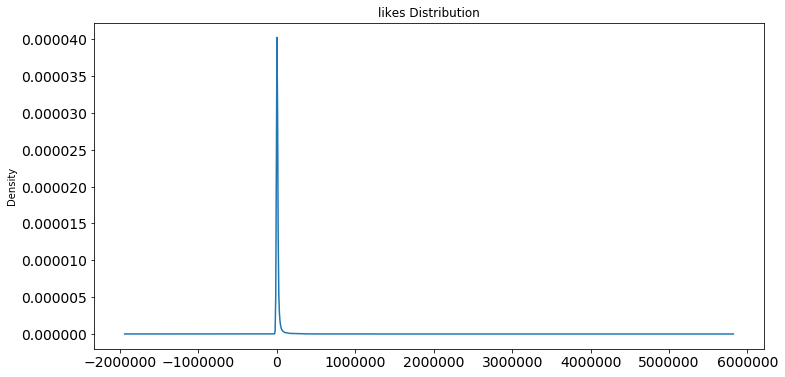

In [12]:
_=train[Target_col].plot(kind='density',title='likes Distribution',fontsize=14,figsize=(12,6))

As we can see the data is highly right skewed, Lets apply log transformation and see

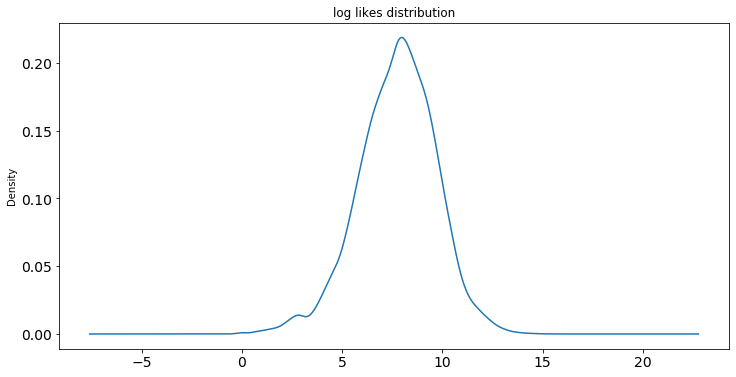

In [13]:
_=pd.Series(np.log1p(train[Target_col])).plot(kind='density',title='log likes distribution',fontsize=14,figsize=(12,6))

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       26061 non-null  int64  
 1   title          26061 non-null  object 
 2   channel_title  26061 non-null  object 
 3   category_id    26061 non-null  float64
 4   publish_date   26061 non-null  object 
 5   tags           26061 non-null  object 
 6   views          26061 non-null  float64
 7   dislikes       26061 non-null  float64
 8   comment_count  26061 non-null  float64
 9   description    26061 non-null  object 
 10  country_code   26061 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


In [15]:
train.nunique()

video_id         26061
title            26005
channel_title     5764
category_id         17
publish_date       348
tags             21462
views            25338
dislikes          2633
comment_count     4993
description      23426
country_code         4
likes            12134
dtype: int64

In [16]:
num_cols = ['views', 'dislikes', 'comment_count']


Univariate analysis for numerical columns

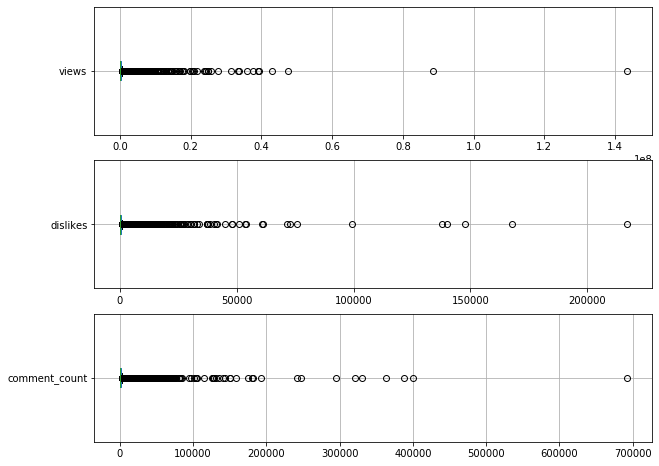

In [17]:
fig,axes=plt.subplots(3,1,figsize=(10,8))
for i,c in enumerate(num_cols):
    _=train[[c]].boxplot(ax=axes[i],vert=False)

All these numeric columns seems to be rig-ht skewed, so lets take log tranformation for these and see

In [18]:
#Log transformation of numeric columns
for c in num_cols+['likes']:
    train[c]=np.log1p(train[c])

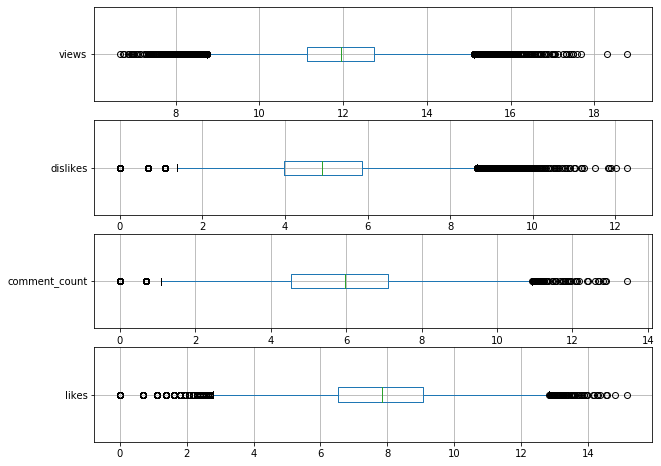

In [19]:
fig,axes=plt.subplots(4,1,figsize=(10,8))
for i,c in enumerate(num_cols+['likes']):
    _=train[[c]].boxplot(ax=axes[i],vert=False)

### Bivariate analysis

Correlation heatmap

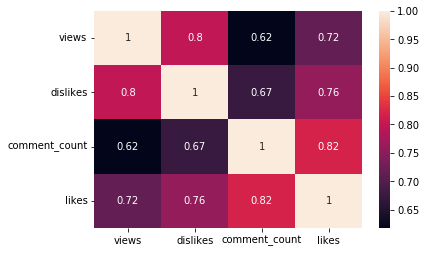

In [20]:
sns.heatmap(train[num_cols+['likes']].corr(),annot=True)

#### Categorical columns

In [21]:
cat_cols=['category_id', 'country_code', 'channel_title']

In [22]:
train['channel_title'].nunique

<bound method IndexOpsMixin.nunique of 0                       HUM TV
1        ABS-CBN Entertainment
2           SANDALWOOD REVIEWS
3                  doddleoddle
4               Dude Seriously
                 ...          
26056             Casey Holmes
26057               First Show
26058            Speed Records
26059                    Vat19
26060               NewsOne Pk
Name: channel_title, Length: 26061, dtype: object>

In [23]:
train['country_code'].value_counts()[::-1]

GB     2239
US     3095
CA    10326
IN    10401
Name: country_code, dtype: int64

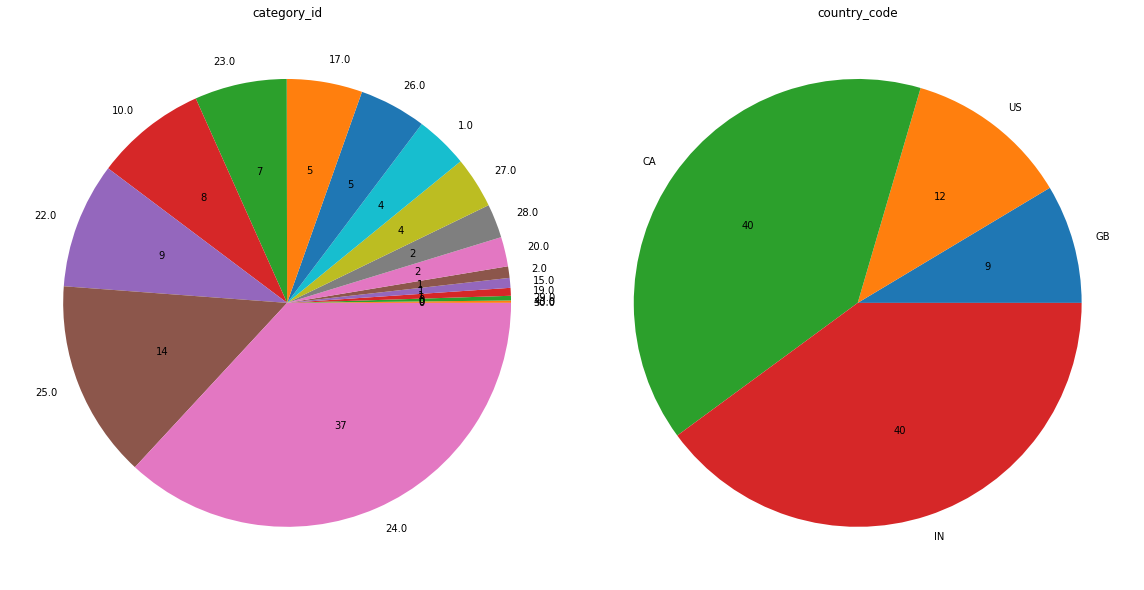

In [24]:
#AS channel title has lot of unique values lets remove that in pie chart creation
fig,axes=plt.subplots(1,2,figsize=(16,10))
for i,c in enumerate(['category_id', 'country_code']):
    _=train[c].value_counts()[::-1].plot(kind='pie',ax=axes[i],title=c,autopct='%.0f')
    _=axes[i].set_ylabel('')
plt.tight_layout()


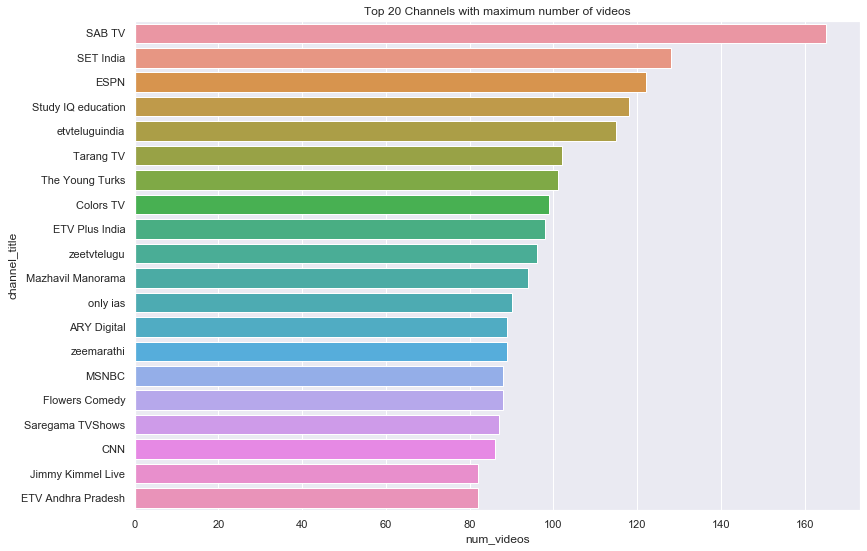

In [25]:
sns.set(rc={'figure.figsize':(13,9)})
top_20_channels=train['channel_title'].value_counts()[:20].reset_index()
top_20_channels.columns=['channel_title','num_videos']

_=sns.barplot(data=top_20_channels,y='channel_title',x='num_videos')
_=plt.title('Top 20 Channels with maximum number of videos')

### Bivariate analysis for categorical columns
*** Country wise number of videos for channels ***

In [26]:
train.groupby(['country_code','channel_title']).size()

country_code  channel_title           
CA            #Mind Warehouse             7
              #SeekingTheTruth            1
              -Wen Zhao Official文昭談古論今    4
              078jordan1                  1
              12up                        1
                                         ..
US            voordeel                    1
              wdwmagic                    1
              yovo68                      1
              圧倒的不審者の極み!                  1
              郭韋辰                         1
Length: 6675, dtype: int64

In [27]:
country_wise_channels=train.groupby(['country_code','channel_title']).size().reset_index()
country_wise_channels.columns = ['country_code', 'channel_title', 'num_videos']
country_wise_channels=country_wise_channels.sort_values(by='num_videos',ascending=False)

country_wise_channels

,country_code,channel_title,num_videos
4937,IN,Study IQ education,118
5237,IN,etvteluguindia,115
5016,IN,Tarang TV,102
2220,CA,The Young Turks,100
4254,IN,Colors TV,99
...,...,...,...
2890,GB,All Time Low,1
2889,GB,Alissa Ashley,1
2888,GB,Ali-A,1
2886,GB,Alesso,1


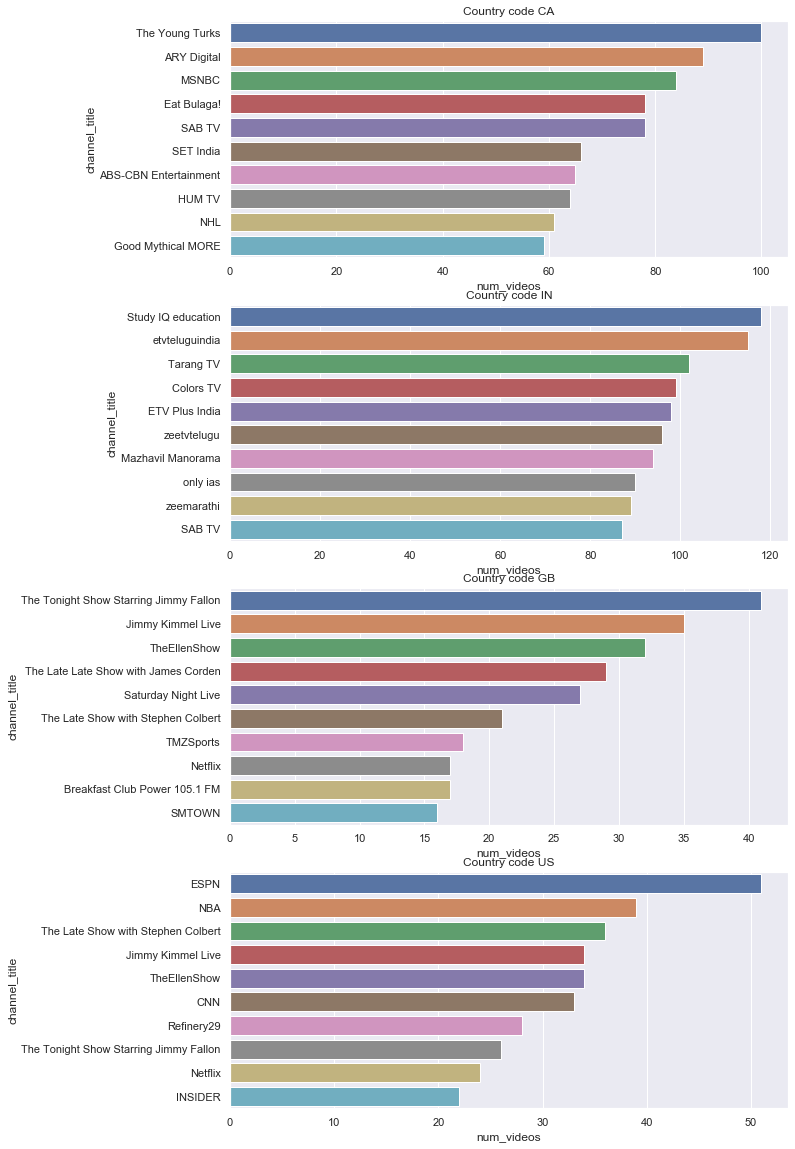

In [28]:
fig,axes=plt.subplots(4,1,figsize=(10,20))

for i,c in enumerate(train['country_code'].unique()):
    country=country_wise_channels[country_wise_channels['country_code']==c][:10]
    _=sns.barplot(x='num_videos',y='channel_title',data=country,ax=axes[i])
    _=axes[i].set_title(f'Country code {c}')

### Likes distribution per category


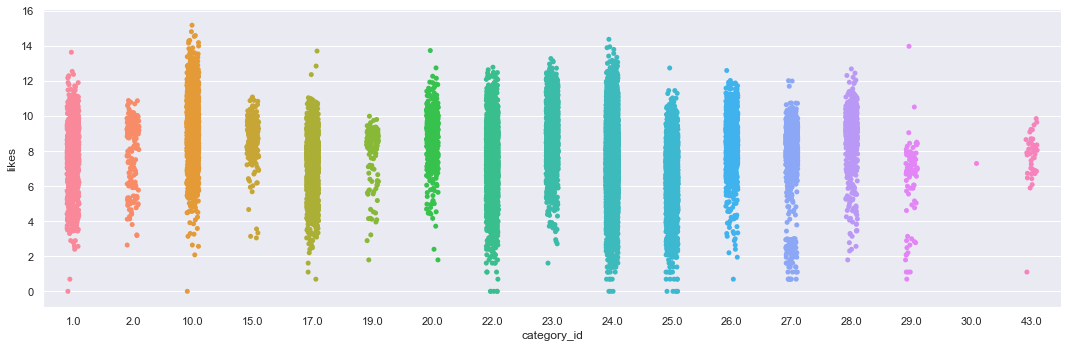

In [29]:
_=sns.catplot(x='category_id',y='likes',data=train,height=5,aspect=24/8)

### Likes distribution per country

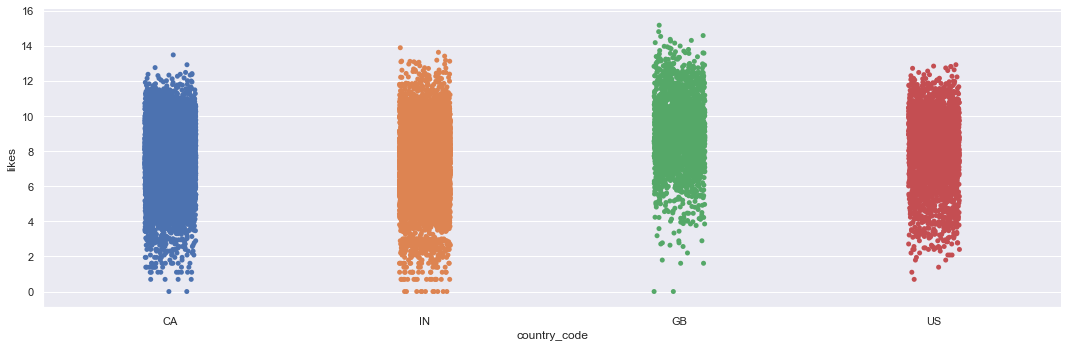

In [30]:
_=sns.catplot(x='country_code',y='likes',data=train,height=5,aspect=24/8)

likes in britain is comparitively high

##### Average likes per country

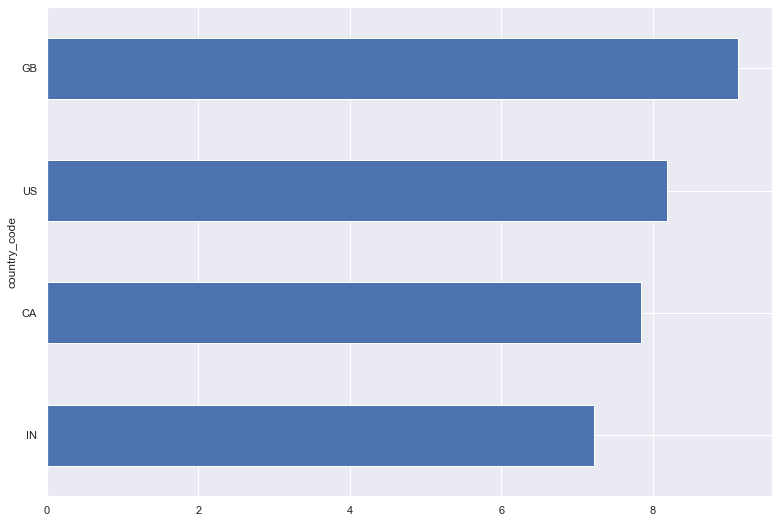

In [31]:
_=train.groupby('country_code')['likes'].mean().sort_values().plot(kind='barh')

#### Date time variables

In [32]:
train['publish_date']=pd.to_datetime(train['publish_date'],format='%Y-%m-%d')
test['publish_date']=pd.to_datetime(test['publish_date'],format='%Y-%m-%d')

In [33]:
train['publish_date']

0       2017-12-12
1       2018-03-08
2       2018-03-26
3       2018-02-21
4       2018-05-10
           ...    
26056   2018-01-16
26057   2017-12-17
26058   2018-03-04
26059   2018-05-17
26060   2018-01-16
Name: publish_date, Length: 26061, dtype: datetime64[ns]

In [34]:
train['publish_date'].min(),train['publish_date'].max()

(Timestamp('2006-07-23 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [35]:
train['publish_date'].dt.year.value_counts()

2018    18841
2017     7132
2015       16
2016       16
2011       13
2014        9
2013        9
2009        8
2012        6
2010        4
2008        3
2007        3
2006        1
Name: publish_date, dtype: int64

#### Number of videos in data datewise

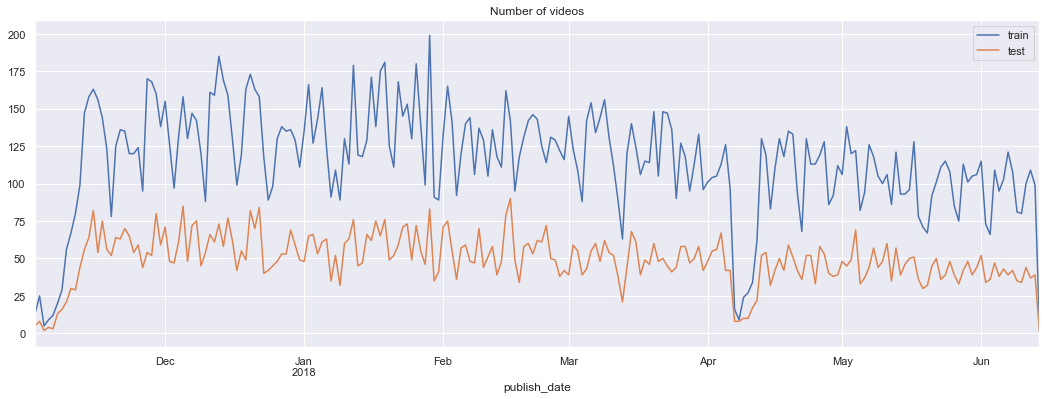

In [36]:
latest_data_train=train[train['publish_date']>'2017-11']
latest_data_test=test[test['publish_date']>'2017-11']
_=latest_data_train.sort_values(by='publish_date').groupby('publish_date').size().rename('train').plot(figsize=(18,6),title='Number of videos')
_=latest_data_test.sort_values(by='publish_date').groupby('publish_date').size().rename('test').plot(figsize=(18,6),title='Number of videos')
_=plt.legend()

### Average likes in data sorted by date


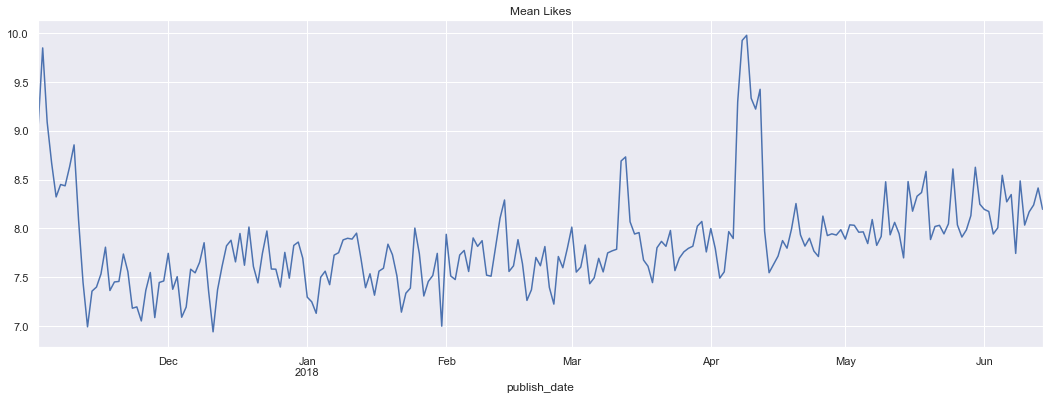

In [37]:
_=latest_data_train.sort_values(by='publish_date').groupby('publish_date')['likes'].mean().plot(figsize=(18, 6), title="Mean Likes")

##### Number of videos by country

In [38]:
tmp=latest_data_train.groupby(['publish_date','country_code']).size().reset_index()
a=tmp.pivot_table(index='publish_date',columns='country_code',values=0)

In [39]:
a

country_code,CA,GB,IN,US
publish_date,,,,
2017-11-02,1.0,11.0,NaN,1.0
2017-11-03,1.0,24.0,NaN,NaN
2017-11-04,NaN,5.0,NaN,NaN
2017-11-05,NaN,9.0,NaN,NaN
2017-11-06,NaN,11.0,NaN,1.0
...,...,...,...,...
2018-06-10,42.0,2.0,31.0,5.0
2018-06-11,46.0,4.0,45.0,5.0
2018-06-12,64.0,5.0,37.0,3.0


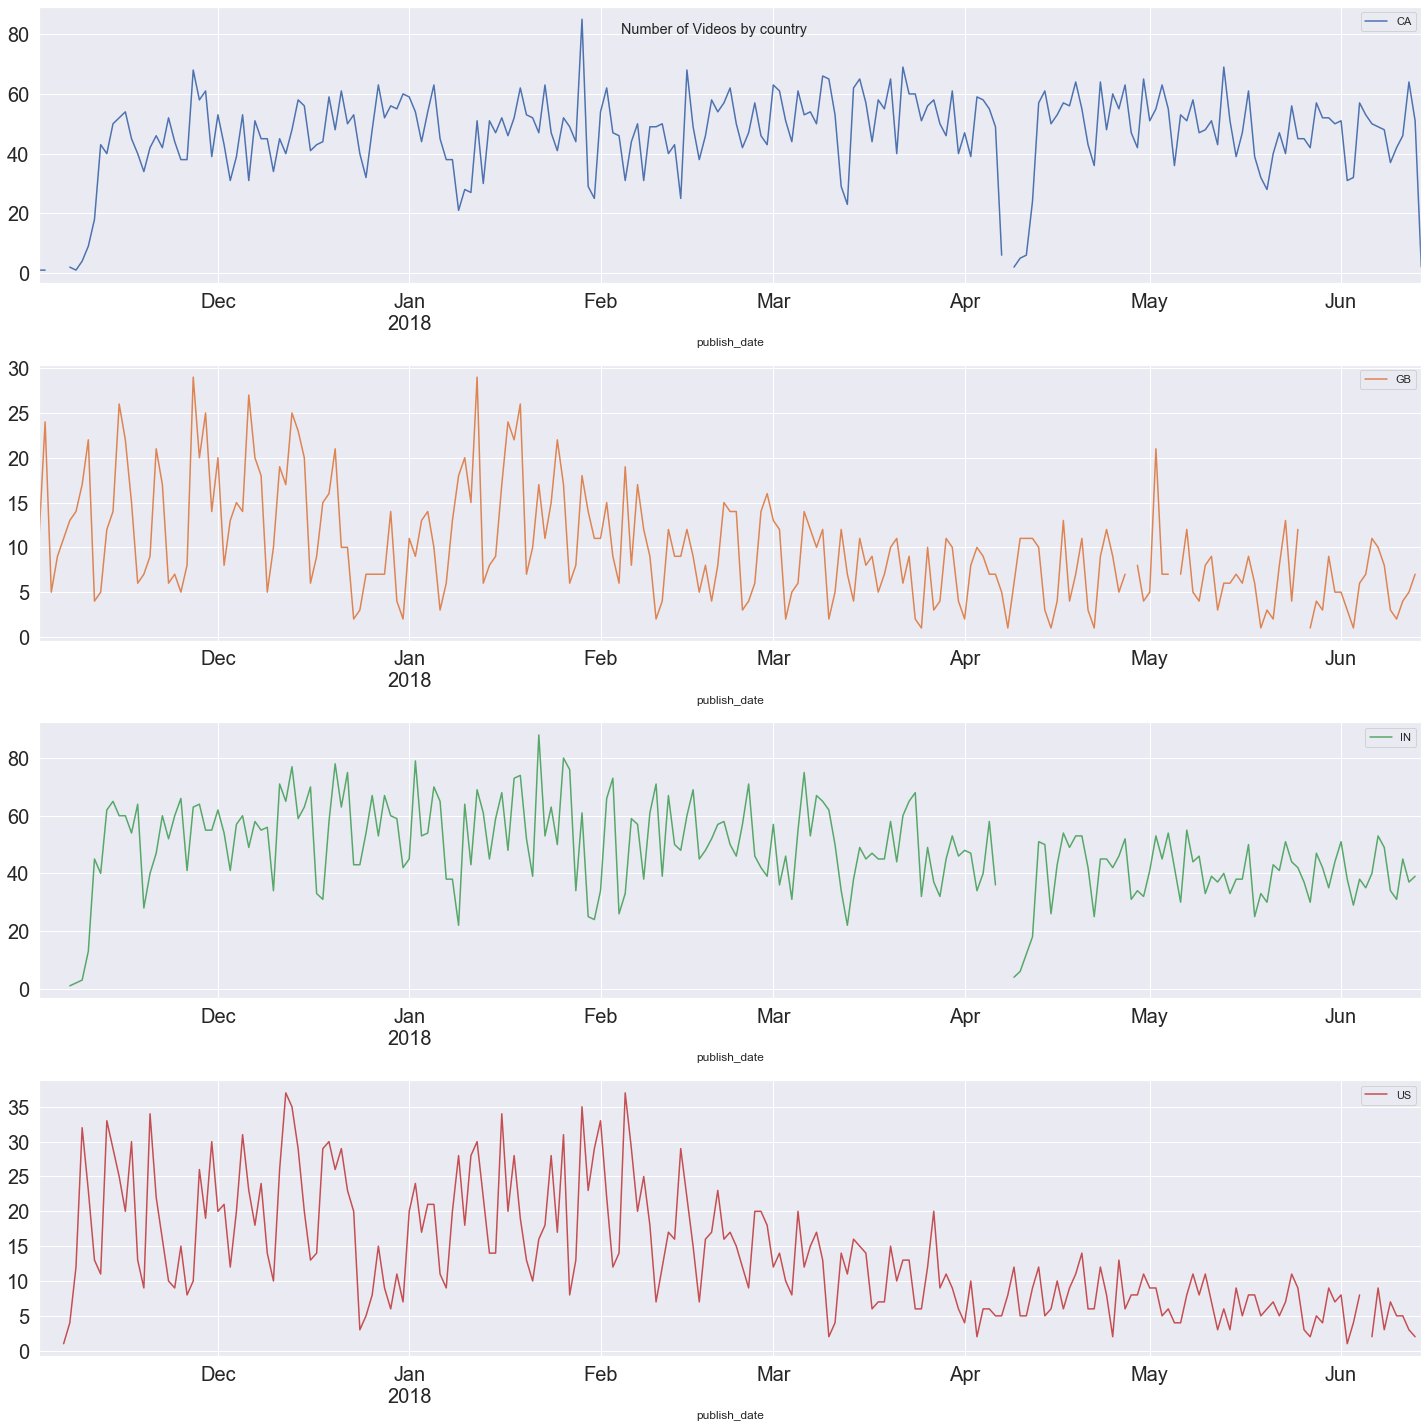

In [40]:
tmp = latest_data_train.groupby(['publish_date', 'country_code']).size().reset_index()
_ = tmp.pivot_table(index = 'publish_date', columns = 'country_code', values=0).plot(subplots=True, figsize=(20, 20),
                                                                                           title='Number of Videos by country',
                                                                                           sharex=False,
                                                                                           fontsize=20)
plt.tight_layout()

### Average number of likes by country order by date

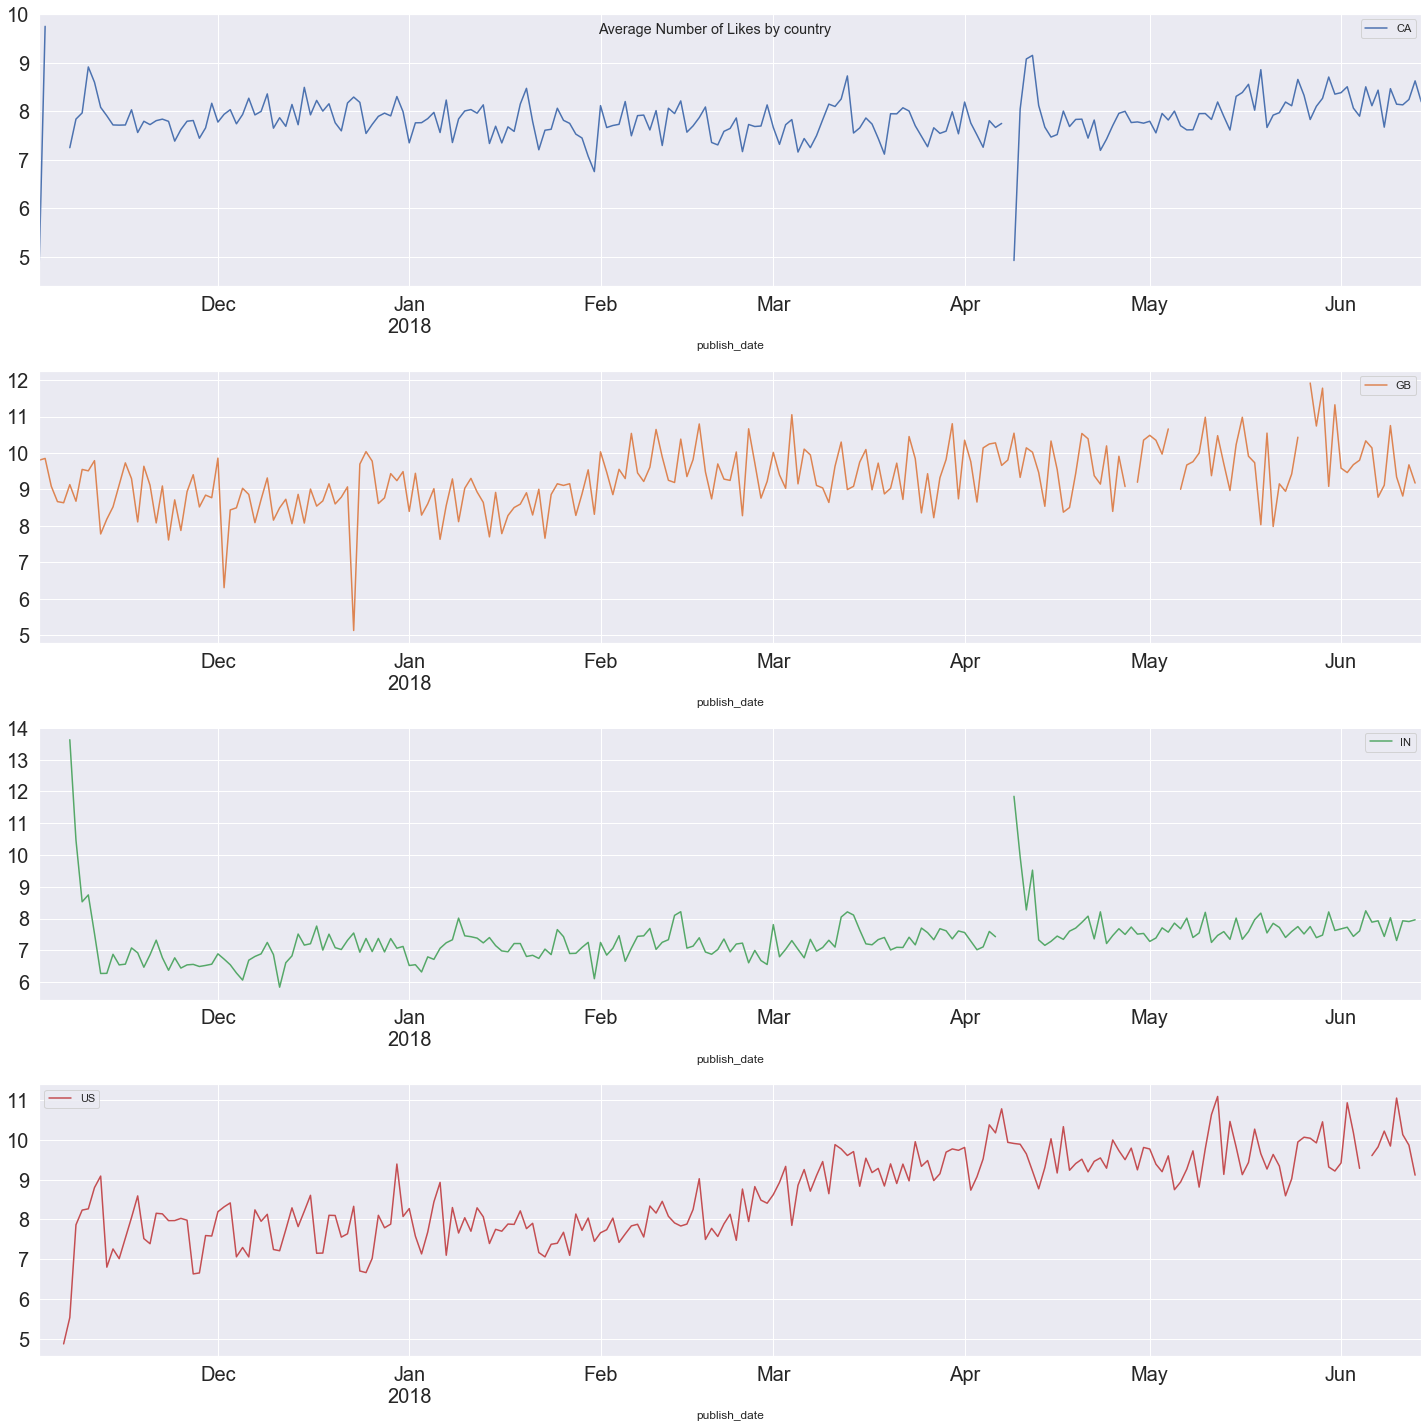

In [41]:
tmp = latest_data_train.groupby(['publish_date', 'country_code'])['likes'].mean().reset_index()
_ = tmp.pivot_table(index = 'publish_date', columns = 'country_code', values='likes').plot(subplots=True, figsize=(20,20),
                                                                                           title='Average Number of Likes by country',
                                                                                           sharex=False,
                                                                                           fontsize=20)
plt.tight_layout()

In [42]:
train.head()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",12.769769,5.700444,6.803505,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,CA,7.763021
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,24.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",13.042257,4.317488,5.752573,Vice Ganda notices Bela Padilla's sudden chang...,CA,8.091015
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,SANDALWOOD REVIEWS,24.0,2018-03-26,"challenging star darshan latest news|""challeng...",10.601772,5.017280,4.615121,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,IN,6.364751
3,22618,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10.0,2018-02-21,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",13.141631,6.742881,8.420021,Hi hi hi! here's our vid on FLASHBACK's channe...,GB,11.323869
4,74074,MUMMY NE NI KEHTA - 2 FT. 102 NOT OUT| DUDE S...,Dude Seriously,23.0,2018-05-10,"dude|""seriously""|""friends""|""fun""|""gujarati""|""h...",11.216028,4.248495,5.087596,BOOK YOUR TICKETS HERE: https://goo.gl/QxdSyg...,IN,8.176954


In [43]:
test.head()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code
0,87185,జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...,CHIRRAVURI FOUNDATION,22.0,2018-01-17,"Chirravuri|""Foundation""|""chirravuri foundation...",80793.0,54.0,79.0,8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...,IN
1,9431,ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...,VIRAL IN INDIA,22.0,2017-11-18,"Raj Thackeray|""LIVE SPEECH""|""latest Speech""|""r...",150317.0,230.0,311.0,Don't Forget to SUBSCIRBE to our YouTube Chann...,IN
2,40599,"Thank you, Rider Nation!",Saskatchewan Roughriders,17.0,2017-12-01,"Roughriders|""Riders""|""CFL""|""Regina""|""Saskatche...",6558.0,10.0,7.0,"“To the devoted, the impassioned, the loyal:\n...",CA
3,494,Measuring RPM with a spectrum analyzer mobile app,Matthias Wandel,26.0,2018-02-06,"rpm|""woodworking""|""tool speed""|""blade speed""|""...",89664.0,145.0,324.0,Using a spectrum analyzer app to analyze the s...,US
4,73942,Anchor Anasuya responded on Phone breaking iss...,AVA Creative thoughts,22.0,2018-02-06,"anasuya responded|""anasuya issue""|""anasuya bor...",53526.0,357.0,153.0,Welcome to AVA Creative thoughts Channel Subsc...,IN


In [44]:
#Log transformation of numeric columns
for c in num_cols:
    test[c]=np.log1p(test[c])

In [45]:
test[cat_cols].nunique()

category_id        16
country_code        4
channel_title    3598
dtype: int64

#### Analyze textual data

In [46]:
text_cols = ['title', 'tags', 'description']

In [47]:
from wordcloud import WordCloud,STOPWORDS

In [48]:
wc=WordCloud(stopwords=set(list(STOPWORDS)+['|']),random_state=42)

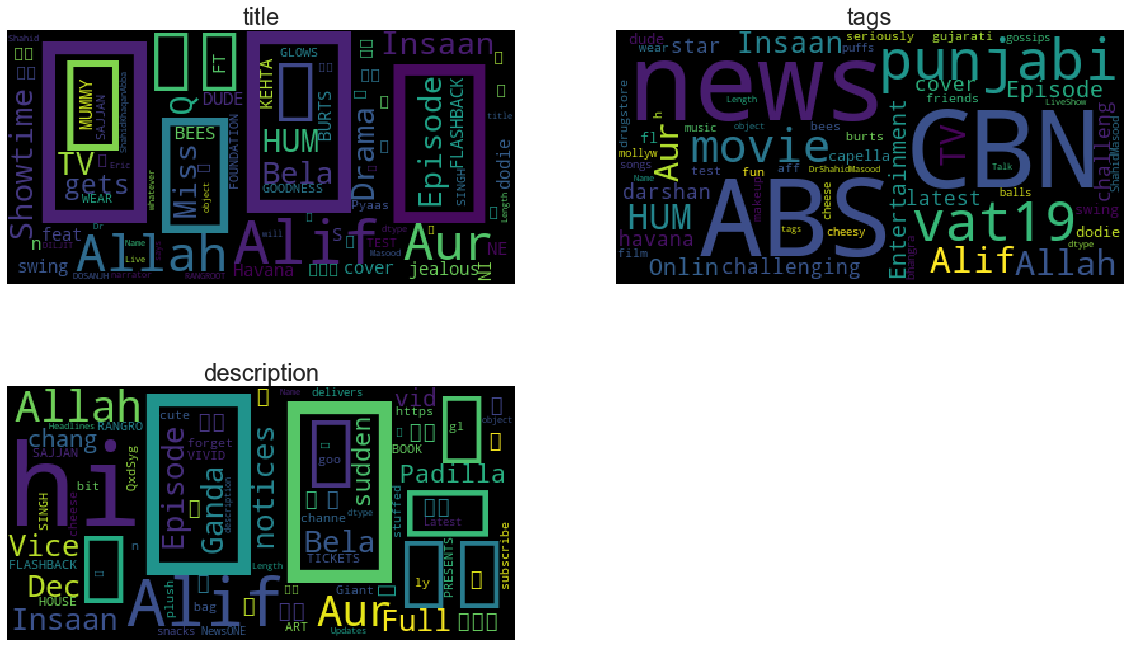

In [49]:
fig,axes=plt.subplots(2,2,figsize=(20,12))
axes=[ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(text_cols):
    op=wc.generate(str(train[c]))
    _=axes[i].imshow(op)
    _=axes[i].set_title(c,fontsize=24)
    _=axes[i].axis('off')
_=fig.delaxes(axes[3])

### Country wise highly liked Youtube videos top words

In [50]:
def plot_countrywise(country_code='IN'):
    country=train[train['country_code']==country_code]
    country=country[country['likes']>10]
    fig,axes=plt.subplots(2,2,figsize=(20,12))
    axes=[ax for axes_row in axes for ax in axes_row]
    
    for i,c in enumerate(text_cols):
        op=wc.generate(str(country[c]))
        _=axes[i].imshow(op)
        _=axes[i].set_title(c,fontsize=24)
        _=axes[i].axis('off')
    fig.delaxes(axes[3])
    _=plt.suptitle(f'country code:{country_code}',fontsize=30)

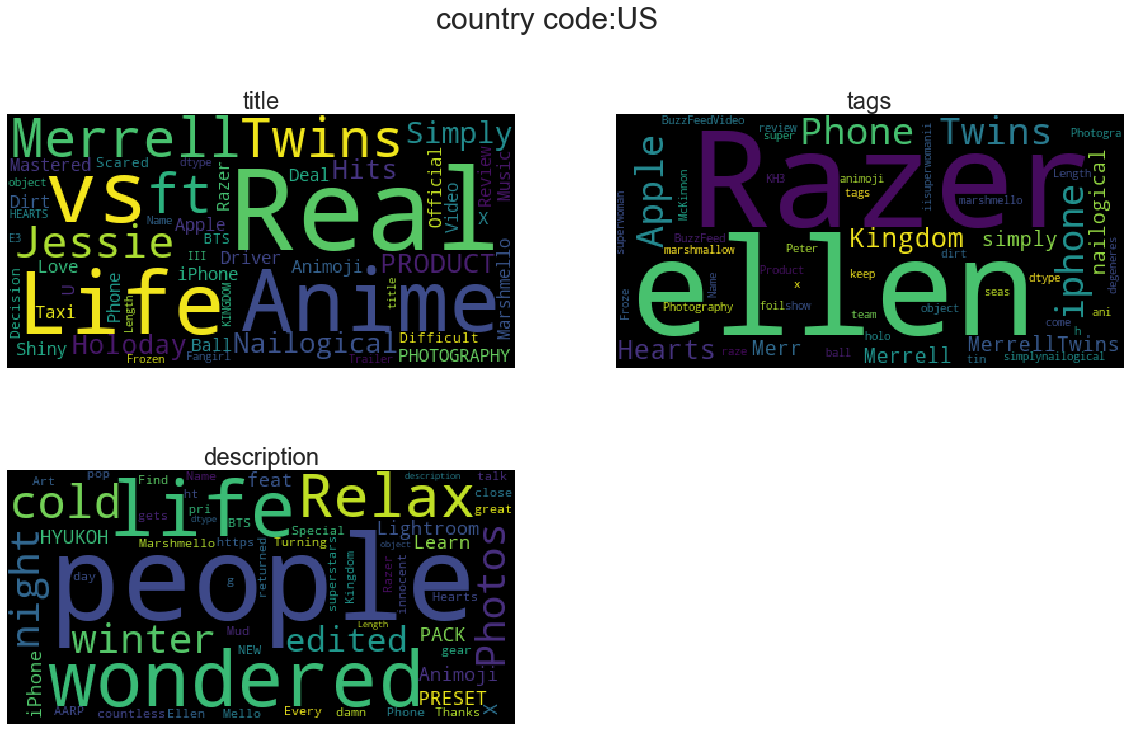

In [51]:
plot_countrywise("US")

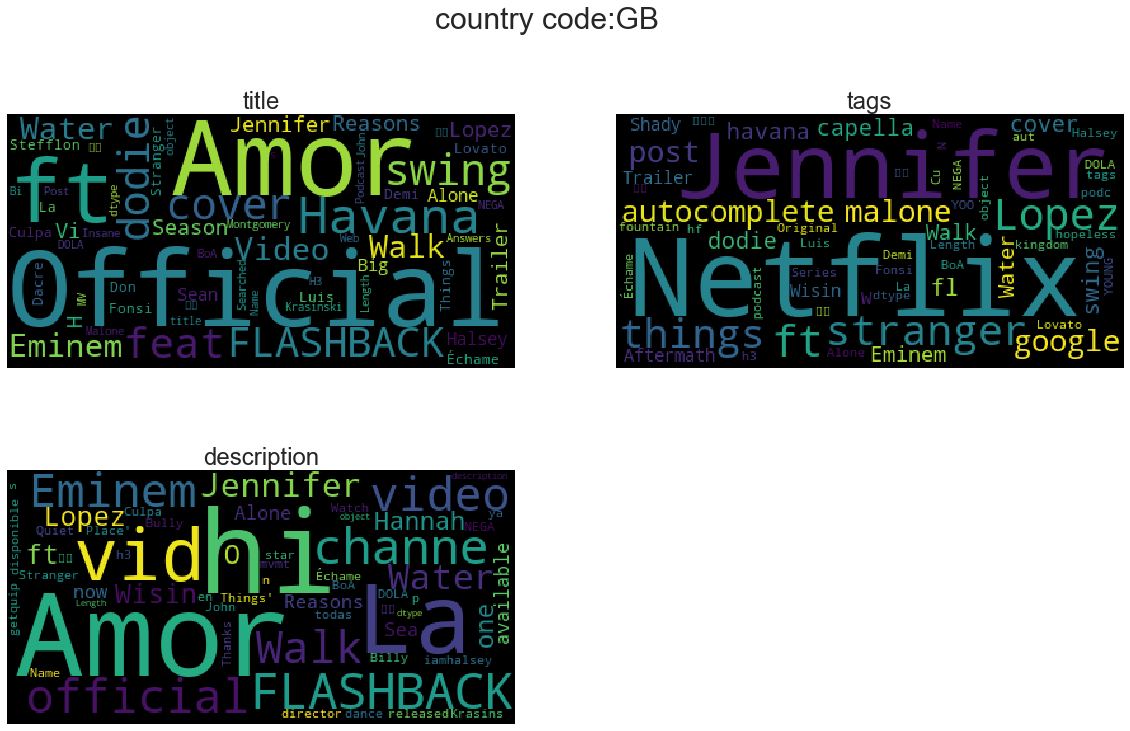

In [52]:
plot_countrywise("GB")

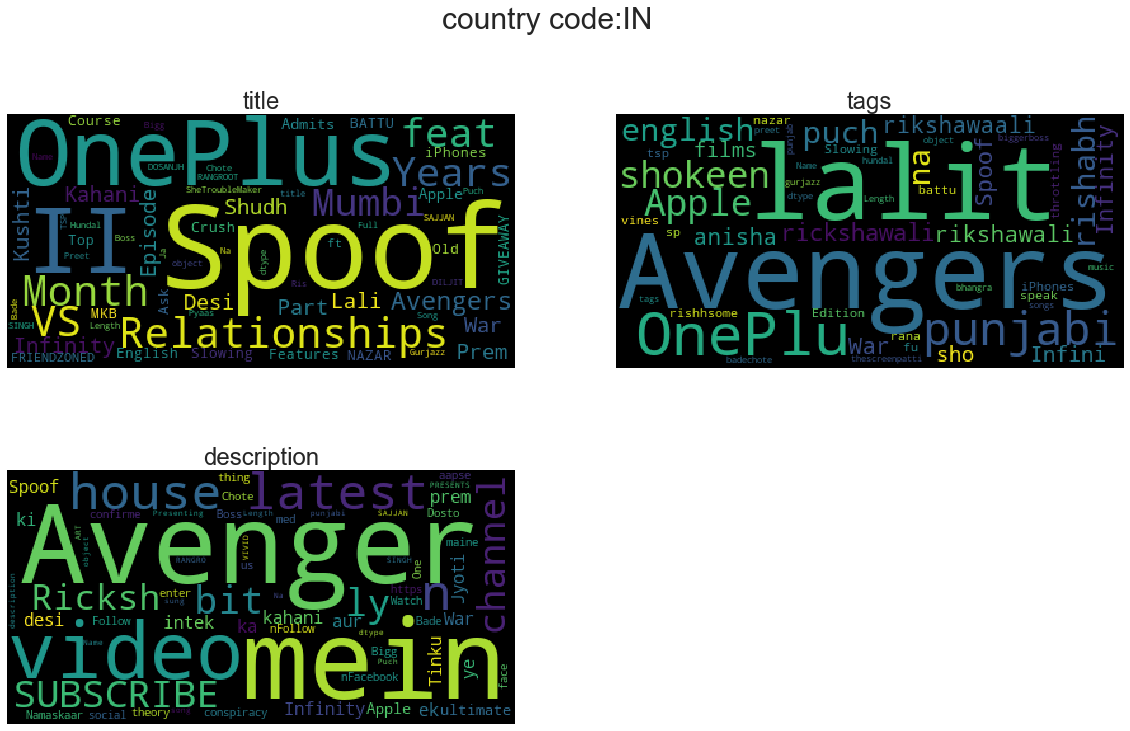

In [53]:
plot_countrywise("IN")


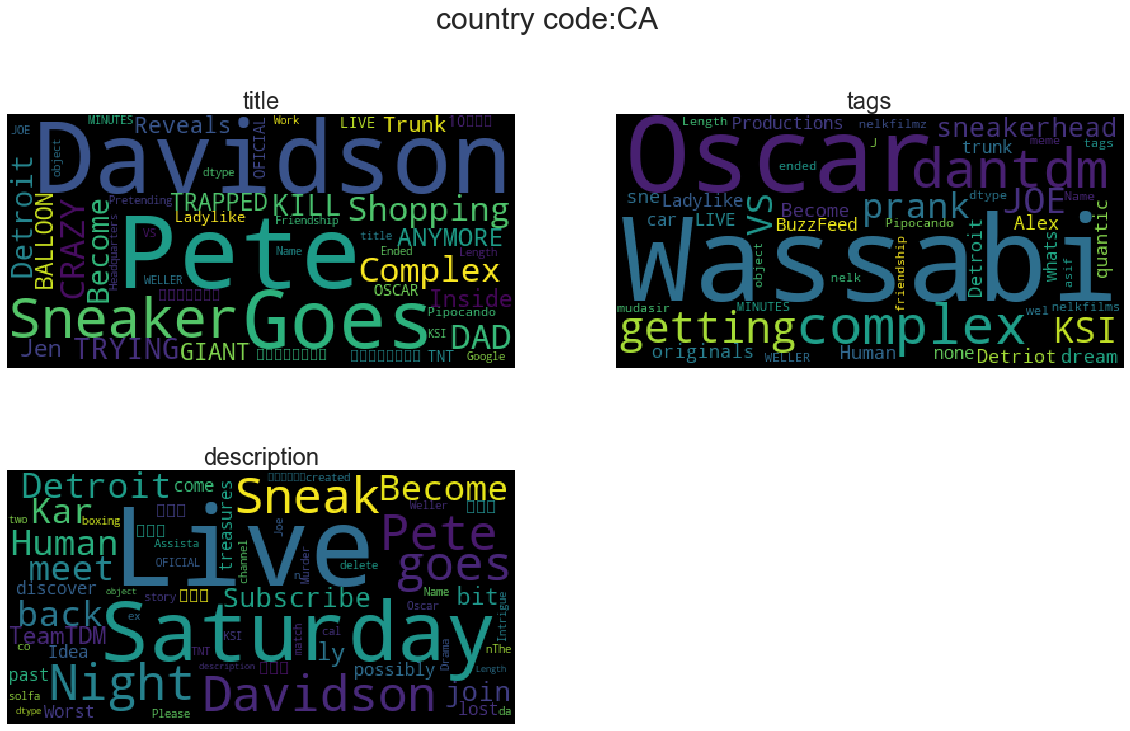

In [54]:
plot_countrywise("CA")


In [55]:
train.shape

(26061, 12)

In [56]:
test.shape

(11170, 11)

In [57]:
num_cols = ['views', 'dislikes', 'comment_count']
cat_cols = ['category_id', 'country_code']
text_cols = ['title', 'channel_title', 'tags', 'description']
date_cols = ['publish_date']


Onehot encoding of categorical columns

In [58]:
# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder

In [59]:
train['category_id']=train['category_id'].astype('object')

In [60]:
test['category_id']=test['category_id'].astype('object')

In [61]:
df_train=train.copy()

In [62]:
train=train.drop('likes',axis=1)

In [63]:
ohe_enc = OneHotEncoder(
    top_categories=15,  # you can change this value to select more or less variables
    # we can select which variables to encode
    variables=cat_cols,
    drop_last=False)

ohe_enc.fit(train)

OneHotEncoder(top_categories=15, variables=['category_id', 'country_code'])

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       26061 non-null  int64         
 1   title          26061 non-null  object        
 2   channel_title  26061 non-null  object        
 3   category_id    26061 non-null  object        
 4   publish_date   26061 non-null  datetime64[ns]
 5   tags           26061 non-null  object        
 6   views          26061 non-null  float64       
 7   dislikes       26061 non-null  float64       
 8   comment_count  26061 non-null  float64       
 9   description    26061 non-null  object        
 10  country_code   26061 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 2.2+ MB


In [65]:
# in the encoder dict we can observe each of the top categories
# selected for each of the variables

ohe_enc.encoder_dict_

{'category_id': [24.0,
  25.0,
  22.0,
  10.0,
  23.0,
  17.0,
  26.0,
  1.0,
  27.0,
  28.0,
  20.0,
  2.0,
  15.0,
  19.0,
  29.0],
 'country_code': ['IN', 'CA', 'US', 'GB']}

In [66]:
train = ohe_enc.transform(train)




In [67]:
test = ohe_enc.transform(test)

In [68]:
train.shape

(26061, 28)

In [69]:
test.shape

(11170, 28)

In [70]:
train.head()

,video_id,title,channel_title,publish_date,tags,views,dislikes,comment_count,description,category_id_24.0,...,category_id_28.0,category_id_20.0,category_id_2.0,category_id_15.0,category_id_19.0,category_id_29.0,country_code_IN,country_code_CA,country_code_US,country_code_GB
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",12.769769,5.700444,6.803505,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,1,...,0,0,0,0,0,0,0,1,0,0
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",13.042257,4.317488,5.752573,Vice Ganda notices Bela Padilla's sudden chang...,1,...,0,0,0,0,0,0,0,1,0,0
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,SANDALWOOD REVIEWS,2018-03-26,"challenging star darshan latest news|""challeng...",10.601772,5.017280,4.615121,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,1,...,0,0,0,0,0,0,1,0,0,0
3,22618,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,2018-02-21,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",13.141631,6.742881,8.420021,Hi hi hi! here's our vid on FLASHBACK's channe...,0,...,0,0,0,0,0,0,0,0,0,1
4,74074,MUMMY NE NI KEHTA - 2 FT. 102 NOT OUT| DUDE S...,Dude Seriously,2018-05-10,"dude|""seriously""|""friends""|""fun""|""gujarati""|""h...",11.216028,4.248495,5.087596,BOOK YOUR TICKETS HERE: https://goo.gl/QxdSyg...,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
df_train.shape

(26061, 12)

In [72]:
df_train[Target_col]

0         7.763021
1         8.091015
2         6.364751
3        11.323869
4         8.176954
           ...    
26056     8.889722
26057     7.292337
26058    10.603685
26059     8.354204
26060     7.712891
Name: likes, Length: 26061, dtype: float64

In [73]:
train['likes']=df_train['likes']

In [74]:
features = [c for c in train.columns if c not in [ID_col,Target_col]]

In [75]:
trn,val=train_test_split(train,test_size=0.2,random_state=42)

#Input to our model will be the features
X_trn,X_val=trn[features],val[features]
### Output of our model will be target col
y_trn,y_val=trn[Target_col],val[Target_col]


In [76]:
X_test=test[features]

### To check results on validation datase after train of model

In [77]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error

In [78]:
def rmsle(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true,y_pred))

#The metric to test is given as 1000*RMSLE
# As we have already taken log for target we  can use RMSE to get RMSLE
def av_metric(y_true,y_pred):
    return 1000*np.sqrt(mean_squared_error(y_true,y_pred))

In [79]:
features=[c for c in X_trn.columns if c not in [ID_col,Target_col]]
cat_num_cols=[c for c in features if c not in text_cols+date_cols]

In KFold we may have trained on data which has less number of likes and tested on data which has more number of likes and vice versa in another fold etc. So our model won't perform well in that case. So we can use stratification. So in regression problem we can imagine 2 groups like one with high and one with low. In binary classification we used to consider 0 and 1 class and stratify them. here we are distributing high like and low like videos uniformly 

In stratification for regression we need to have some way to tell models that these samples have high number of likes and these have low number of likes. We use binning for this

pd.qcut will split data into bins so each bin will have equal number of samples

In [80]:
#Just for example..1st arg - series we have to split, second is number of bins
pd.qcut(np.arange(10),10,labels=False,duplicates='drop')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [81]:
pd.qcut(np.arange(10),5,labels=False,duplicates='drop')

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], dtype=int64)

In [82]:
clf=LinearRegression()

In [83]:
_=clf.fit(X_trn[cat_num_cols],y_trn)

In [84]:
preds_val=clf.predict(X_val[cat_num_cols])

In [85]:
av_metric_score = av_metric(y_val, preds_val)

In [86]:
av_metric_score

852.2317991157985

In [87]:
clf = DecisionTreeRegressor(random_state=420)

_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}')


AV metric score is: 916.819362661716


In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
hyperparam={    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128]}

In [90]:
clf = RandomizedSearchCV(DecisionTreeRegressor(),
                         hyperparam,
                         scoring='neg_root_mean_squared_error',
                         random_state=1,
                         n_iter=20)

search = clf.fit(train[cat_num_cols], train[Target_col])

search.best_params_

{'min_samples_split': 30,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}

In [91]:
best_params={'min_samples_split': 30,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}


In [92]:
clf=DecisionTreeRegressor(**best_params)

In [93]:
_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 744.9198790916


In [94]:
regr = RandomForestRegressor(max_depth=6, random_state=42)
_ = regr.fit(X_trn[cat_num_cols], y_trn)

preds_val = regr.predict(X_val[cat_num_cols])

av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}')


AV metric score is: 766.7365843032379


In [95]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 7)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid)

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 8, 15, 23, 30, 37, 45], 'min_samples_split': [5, 10]}


In [96]:
forest = RandomForestRegressor(n_jobs=-1)
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_root_mean_squared_error')
# Fit the random search model
search = rf_random.fit(train[cat_num_cols], train[Target_col])
search.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [97]:
best_params = {'n_estimators': 155,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [98]:
regr = RandomForestRegressor(**best_params)
_ = regr.fit(X_trn[cat_num_cols], y_trn)

preds_val = regr.predict(X_val[cat_num_cols])

av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}')


AV metric score is: 660.7249106719541


##### Helper function for Stratified Kfold


In [106]:
def run_clf_kfold(clf,train,test,features):
    N_SPLITS=5
    oofs=np.zeros(len(train))
    preds=np.zeros(len(test))
    
    target=train[Target_col]
    
    folds=StratifiedKFold(n_splits=N_SPLITS)
    stratified_target=pd.qcut(train[Target_col],10,labels=False,duplicates='drop')
    
    for fold_,(trn_idx,val_idx) in enumerate(folds.split(train,stratified_target)):
        print(f'--------------Fold{fold_+1}-------------------')
        #Get train,validation and test sets along with target
        #Training set
        X_trn,y_trn=train[features].iloc[trn_idx],target.iloc[trn_idx]
        #validation set
        X_val,y_val=train[features].iloc[val_idx],target.iloc[val_idx]
        
        ##Test set
        X_test=test[features]
        
        #Scaling data
        scaler=StandardScaler()
        _=scaler.fit(X_trn)
        
        X_trn=scaler.transform(X_trn)
        X_val=scaler.transform(X_val)
        X_test=scaler.transform(X_test)
        
      ## Fitting and predicting
        _=clf.fit(X_trn,y_trn)
        
        preds_val=clf.predict(X_val)
        preds_test=clf.predict(X_test)
        
        fold_score = av_metric(y_val,preds_val)
        print(f'\nAV metric score for validation set is {fold_score}')
        
        oofs[val_idx]=preds_val
        preds+=preds_test/N_SPLITS
        
    oofs_score=av_metric(target,oofs)
    print(f'\n\n AV metric for oofs is {oofs_score}')
        
    return oofs,preds

In [107]:
rf_params = best_params = {'n_estimators': 155,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

clf = RandomForestRegressor(**rf_params)
        

In [108]:
dt_oofs,dt_preds=run_clf_kfold(clf,train,test,cat_num_cols)

--------------Fold1-------------------

AV metric score for validation set is 673.6395541646306
--------------Fold2-------------------

AV metric score for validation set is 674.6112652253858
--------------Fold3-------------------

AV metric score for validation set is 671.3719932756833
--------------Fold4-------------------

AV metric score for validation set is 662.3446054013633
--------------Fold5-------------------

AV metric score for validation set is 669.4644843317714


 AV metric for oofs is 670.3006630601991


#### Stratified KFold function for Boosting algorithms

In [114]:
def run_gradient_boosting(clf,fit_params,train,test,features):
    N_SPLITS=5
    oofs=np.zeros(len(train))
    preds=np.zeros(len(test))
    
    target=train[Target_col]
    
    folds=StratifiedKFold(n_splits=N_SPLITS)
    stratified_target=pd.qcut(train[Target_col],10,labels=False,duplicates='drop')
    
    feature_importances=pd.DataFrame()
    
    for fold_,(trn_idx,val_idx) in enumerate(folds.split(train,stratified_target)):
        print(f'\n -----------------Fold{fold_+1}-----------------')
        
        #Training set
        X_trn,y_trn=train[features].iloc[trn_idx],target.iloc[trn_idx]
        
        #Validation set
        X_val,y_val=train[features].iloc[val_idx],target.iloc[val_idx]
        
        ##Test set
        X_test=test[features]
        
        scaler=StandardScaler()
        _=scaler.fit(X_trn)
        
        X_trn = scaler.transform(X_trn)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        _=clf.fit(X_trn,y_trn,eval_set=[(X_val,y_val)],**fit_params)
        
        fold_importance=pd.DataFrame({'fold':fold_+1,'feature':features,'importance':clf.feature_importances_})
        
        feature_importances=pd.concat([feature_importances,fold_importance],axis=0)
        
        preds_val=clf.predict(X_val)
        preds_test=clf.predict(X_test)
        
        fold_score=av_metric(y_val,preds_val)
        print(f'\nAV metric score for validation set is {fold_score}')
        
        oofs[val_idx]=preds_val
        preds+=preds_test/N_SPLITS
        
    oofs_score=av_metric(target,oofs)
    print(f'\n\nAV metric for oofs is {oofs_score}')
    
    feature_importances=feature_importances.reset_index(drop=True)
    fi=feature_importances.groupby('feature')['importance'].mean().sort_values(ascending=False)[:20][::-1]
    fi.plot(kind='barh',figsize=(14,8))
    
    return oofs,preds,fi
    
        
        


 -----------------Fold1-----------------
0:	learn: 1.8630981	test: 1.8540302	best: 1.8540302 (0)	total: 9.06ms	remaining: 27.2s
200:	learn: 0.6826417	test: 0.6986872	best: 0.6986872 (200)	total: 1.22s	remaining: 17s
400:	learn: 0.6507290	test: 0.6741369	best: 0.6741369 (400)	total: 2.43s	remaining: 15.8s
600:	learn: 0.6347832	test: 0.6664379	best: 0.6664379 (600)	total: 3.85s	remaining: 15.4s
800:	learn: 0.6227790	test: 0.6622636	best: 0.6622441 (797)	total: 5.44s	remaining: 14.9s
1000:	learn: 0.6130505	test: 0.6601839	best: 0.6601839 (1000)	total: 6.94s	remaining: 13.9s
1200:	learn: 0.6047080	test: 0.6593160	best: 0.6593160 (1200)	total: 8.52s	remaining: 12.8s
1400:	learn: 0.5971854	test: 0.6585056	best: 0.6584662 (1374)	total: 10.2s	remaining: 11.6s
1600:	learn: 0.5904945	test: 0.6579478	best: 0.6579392 (1589)	total: 12s	remaining: 10.5s
1800:	learn: 0.5838710	test: 0.6577794	best: 0.6577567 (1697)	total: 13.5s	remaining: 9.01s
2000:	learn: 0.5778735	test: 0.6573710	best: 0.6573037 

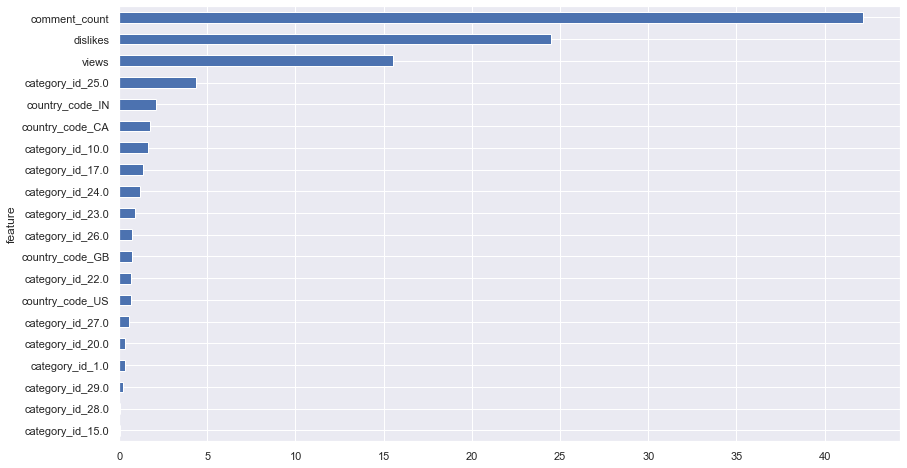

In [115]:
clf=CatBoostRegressor(n_estimators=3000,
                     learning_rate=0.05,
                     rsm=0.4,
                     random_state=42)

fit_params={'verbose':200,'early_stopping_rounds':200}

cb_oofs,cb_preds,fi=run_gradient_boosting(clf,fit_params,train,test,cat_num_cols)

Here we have encoded the features using Onehot encoding. Les try Label encoding and lets do some feature engineering to text cols and date column and add them to our model and check

In [116]:
train1=train.copy()
test1=test.copy()

In [117]:
train.shape,test.shape

((26061, 29), (11170, 28))

In [118]:
train=pd.read_csv('train.csv')

In [119]:
test=pd.read_csv('test.csv')

In [120]:
train['publish_date']=pd.to_datetime(train['publish_date'])

In [121]:
test['publish_date']=pd.to_datetime(test['publish_date'])

#### lets define some helper functions which could help us for combining train and test sets for preprocessing and then splitting them

In [122]:
def join_df(train,test):
    df=pd.concat([train,test],axis=0).reset_index(drop=True)
    features=[c for c in df.columns if c not in [ID_col,Target_col]]
    df[num_cols+['likes']]=df[num_cols+['likes']].apply(lambda x:np.log1p(x))
    
    return df,features

def split_df_and_get_features(df,train_nrows):
    train,test=df[:train_nrows].reset_index(drop=True),df[train_nrows:].reset_index(drop=True)
    features=[c for c in train.columns if c not in [ID_col,Target_col]]
    
    return train,test,features

In [123]:
df,features=join_df(train,test)

In [124]:
cat_cols = ['category_id', 'country_code', 'channel_title']

In [125]:
# Label encoding
df[cat_cols]=df[cat_cols].apply(lambda x:pd.factorize(x)[0])

In [126]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y-%m-%d')

In [128]:
df['publish_date_days_since_start']=(df['publish_date']-df['publish_date'].min()).dt.days
df['publish_date_day_of_week']=df['publish_date'].dt.dayofweek
df['publish_date_year'] = df['publish_date'].dt.year
df['publish_date_month'] = df['publish_date'].dt.month


In [130]:
features = [c for c in df.columns if c not in [ID_col,Target_col]]

cat_num_cols=[c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [131]:
cat_num_cols

['channel_title',
 'category_id',
 'views',
 'dislikes',
 'comment_count',
 'country_code',
 'publish_date_days_since_start',
 'publish_date_day_of_week',
 'publish_date_year',
 'publish_date_month']

In [132]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])


 -----------------Fold1-----------------
0:	learn: 1.8628676	test: 1.8544189	best: 1.8544189 (0)	total: 4.24ms	remaining: 12.7s
200:	learn: 0.6843852	test: 0.7079173	best: 0.7079173 (200)	total: 1.02s	remaining: 14.2s
400:	learn: 0.6382482	test: 0.6685830	best: 0.6685830 (400)	total: 1.96s	remaining: 12.7s
600:	learn: 0.6097406	test: 0.6511613	best: 0.6511613 (600)	total: 3.01s	remaining: 12s
800:	learn: 0.5877816	test: 0.6403310	best: 0.6403310 (800)	total: 4.3s	remaining: 11.8s
1000:	learn: 0.5717027	test: 0.6329615	best: 0.6329615 (1000)	total: 5.3s	remaining: 10.6s
1200:	learn: 0.5573345	test: 0.6280500	best: 0.6280178 (1194)	total: 6.26s	remaining: 9.37s
1400:	learn: 0.5445438	test: 0.6225210	best: 0.6225152 (1399)	total: 7.42s	remaining: 8.46s
1600:	learn: 0.5322996	test: 0.6184693	best: 0.6184312 (1591)	total: 8.23s	remaining: 7.19s
1800:	learn: 0.5215170	test: 0.6154109	best: 0.6154109 (1800)	total: 8.88s	remaining: 5.92s
2000:	learn: 0.5111820	test: 0.6122260	best: 0.6122160 

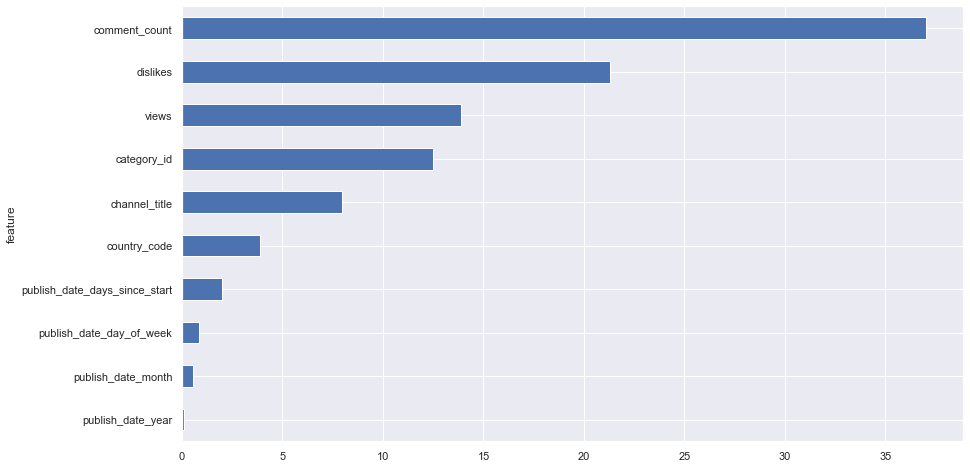

In [133]:
clf = CatBoostRegressor(n_estimators = 3000,
                       learning_rate = 0.05,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=420,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)


In [137]:
#Lets include number of videos per channel and publish date
df['channel_title_num_videos']=df['channel_title'].map(df['channel_title'].value_counts())
df['publish_date_num_videos']=df['publish_date'].map(df['publish_date'].value_counts())

In [138]:
#1 channel may be present in 1 or more countries. Lets include that
df['channel_in_n_countries']=df.groupby('channel_title')['country_code'].transform('nunique')

##### Grouping Features

In [139]:
df['channel_title_mean_views'] = df.groupby('channel_title')['views'].transform('mean')
df['channel_title_max_views'] = df.groupby('channel_title')['views'].transform('max')
df['channel_title_min_views'] = df.groupby('channel_title')['views'].transform('min')

df['channel_title_mean_comments'] = df.groupby('channel_title')['comment_count'].transform('mean')
df['channel_title_max_comments'] = df.groupby('channel_title')['comment_count'].transform('max')
df['channel_title_min_comments'] = df.groupby('channel_title')['comment_count'].transform('min')

In [142]:
train_proc,test_proc,features=split_df_and_get_features(df,train.shape[0])
features = [c for c in df.columns if c not in [ID_col,Target_col]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]


 -----------------Fold1-----------------
0:	learn: 1.8599187	test: 1.8523760	best: 1.8523760 (0)	total: 6.68ms	remaining: 20s
200:	learn: 0.6167706	test: 0.6454550	best: 0.6454550 (200)	total: 1.44s	remaining: 20s
400:	learn: 0.5535483	test: 0.5959821	best: 0.5959821 (400)	total: 2.72s	remaining: 17.6s
600:	learn: 0.5163303	test: 0.5722879	best: 0.5722879 (600)	total: 4.49s	remaining: 17.9s
800:	learn: 0.4880776	test: 0.5563105	best: 0.5563105 (800)	total: 5.99s	remaining: 16.4s
1000:	learn: 0.4656004	test: 0.5452420	best: 0.5452347 (997)	total: 7.49s	remaining: 15s
1200:	learn: 0.4479790	test: 0.5383047	best: 0.5383047 (1200)	total: 8.46s	remaining: 12.7s
1400:	learn: 0.4313292	test: 0.5317785	best: 0.5317785 (1400)	total: 9.66s	remaining: 11s
1600:	learn: 0.4169999	test: 0.5273705	best: 0.5273705 (1600)	total: 10.7s	remaining: 9.39s
1800:	learn: 0.4048268	test: 0.5237924	best: 0.5237830 (1797)	total: 12.1s	remaining: 8.08s
2000:	learn: 0.3931084	test: 0.5210112	best: 0.5209059 (1999

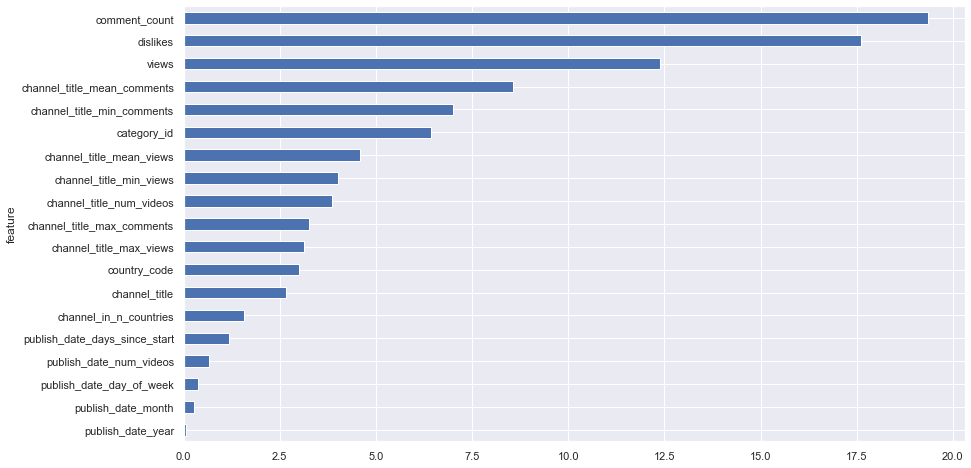

In [143]:
clf = CatBoostRegressor(n_estimators = 3000,
                       learning_rate = 0.05,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=420,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

### Feature Engineering Text data

Lets check if descriptive data get more number of likes

In [144]:
df['title_len']=df['title'].apply(lambda x:len(x))
df['description_len'] = df['description'].apply(lambda x: len(x))
df['tags_len'] = df['tags'].apply(lambda x:len(x))

In [147]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [ID_col,Target_col]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

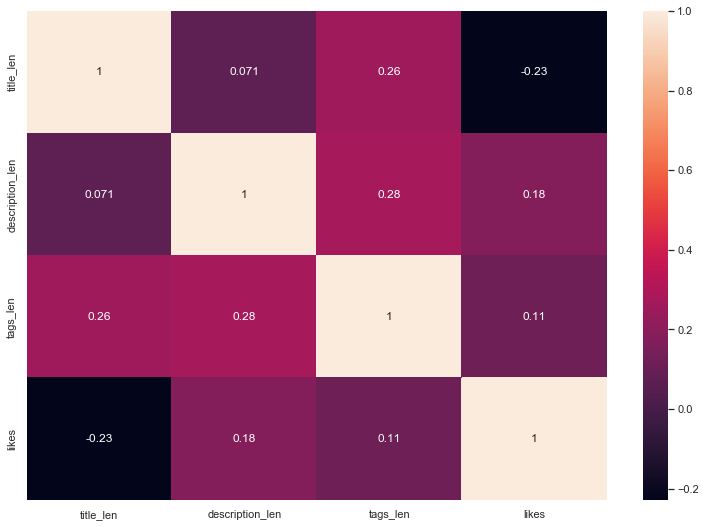

In [149]:
_  = sns.heatmap(train_proc[['title_len', 'description_len', 'tags_len', 'likes']].corr(), annot = True)

We could see that title_len is negatively correlated so we should keep small titles. On the other hand description and tags can be longer


 -----------------Fold1-----------------
0:	learn: 1.8609913	test: 1.8526443	best: 1.8526443 (0)	total: 7.22ms	remaining: 21.7s
200:	learn: 0.6104896	test: 0.6378750	best: 0.6378750 (200)	total: 1.02s	remaining: 14.2s
400:	learn: 0.5414690	test: 0.5869284	best: 0.5869284 (400)	total: 2.12s	remaining: 13.8s
600:	learn: 0.5021010	test: 0.5630272	best: 0.5630268 (599)	total: 3.13s	remaining: 12.5s
800:	learn: 0.4741179	test: 0.5493733	best: 0.5493733 (800)	total: 4.24s	remaining: 11.6s
1000:	learn: 0.4508857	test: 0.5399418	best: 0.5399418 (1000)	total: 5.51s	remaining: 11s
1200:	learn: 0.4308851	test: 0.5313010	best: 0.5312802 (1199)	total: 6.61s	remaining: 9.91s
1400:	learn: 0.4143135	test: 0.5256530	best: 0.5256530 (1400)	total: 7.82s	remaining: 8.93s
1600:	learn: 0.3988584	test: 0.5200214	best: 0.5200214 (1600)	total: 8.97s	remaining: 7.83s
1800:	learn: 0.3848679	test: 0.5156069	best: 0.5155752 (1798)	total: 10.1s	remaining: 6.75s
2000:	learn: 0.3723396	test: 0.5122383	best: 0.512238

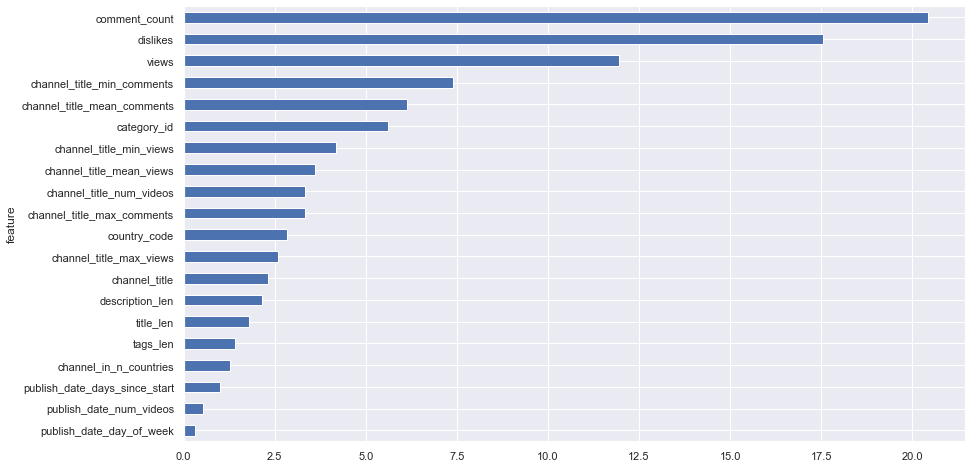

In [150]:
clf = CatBoostRegressor(n_estimators = 3000,
                       learning_rate = 0.05,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=420,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

### bag of words approach for text based features

In [151]:
from sklearn.feature_extraction.text import CountVectorizer

In [152]:
top_n_words=50

vec=CountVectorizer(max_features=top_n_words)
txt_to_fts=vec.fit_transform(df['description']).toarray()
txt_to_fts.shape

(37231, 50)

In [153]:
c='description'
txt_fts_names=[c+f'_word_{i}_count' for i in range(top_n_words)]
df[txt_fts_names]=txt_to_fts



In [155]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [ID_col,Target_col]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [156]:
cat_num_cols

['channel_title',
 'category_id',
 'views',
 'dislikes',
 'comment_count',
 'country_code',
 'publish_date_days_since_start',
 'publish_date_day_of_week',
 'publish_date_year',
 'publish_date_month',
 'channel_title_num_videos',
 'publish_date_num_videos',
 'channel_in_n_countries',
 'channel_title_mean_views',
 'channel_title_max_views',
 'channel_title_min_views',
 'channel_title_mean_comments',
 'channel_title_max_comments',
 'channel_title_min_comments',
 'title_len',
 'description_len',
 'tags_len',
 'description_word_0_count',
 'description_word_1_count',
 'description_word_2_count',
 'description_word_3_count',
 'description_word_4_count',
 'description_word_5_count',
 'description_word_6_count',
 'description_word_7_count',
 'description_word_8_count',
 'description_word_9_count',
 'description_word_10_count',
 'description_word_11_count',
 'description_word_12_count',
 'description_word_13_count',
 'description_word_14_count',
 'description_word_15_count',
 'description_word_1


 -----------------Fold1-----------------
0:	learn: 1.8459788	test: 1.8383191	best: 1.8383191 (0)	total: 19.1ms	remaining: 1m 16s
300:	learn: 0.5352195	test: 0.5771385	best: 0.5771385 (300)	total: 4.1s	remaining: 50.4s
600:	learn: 0.4698970	test: 0.5406489	best: 0.5406489 (600)	total: 7.94s	remaining: 44.9s
900:	learn: 0.4298013	test: 0.5240927	best: 0.5240927 (900)	total: 11.3s	remaining: 38.9s
1200:	learn: 0.4011265	test: 0.5138883	best: 0.5138883 (1200)	total: 14.5s	remaining: 33.8s
1500:	learn: 0.3761453	test: 0.5062748	best: 0.5062748 (1500)	total: 18.6s	remaining: 30.9s
1800:	learn: 0.3564977	test: 0.5020114	best: 0.5020114 (1800)	total: 22.5s	remaining: 27.5s
2100:	learn: 0.3389838	test: 0.4976232	best: 0.4975947 (2099)	total: 26.4s	remaining: 23.8s
2400:	learn: 0.3225439	test: 0.4943462	best: 0.4943455 (2399)	total: 29.3s	remaining: 19.5s
2700:	learn: 0.3091188	test: 0.4918648	best: 0.4918497 (2699)	total: 33.1s	remaining: 15.9s
3000:	learn: 0.2960895	test: 0.4902958	best: 0.49

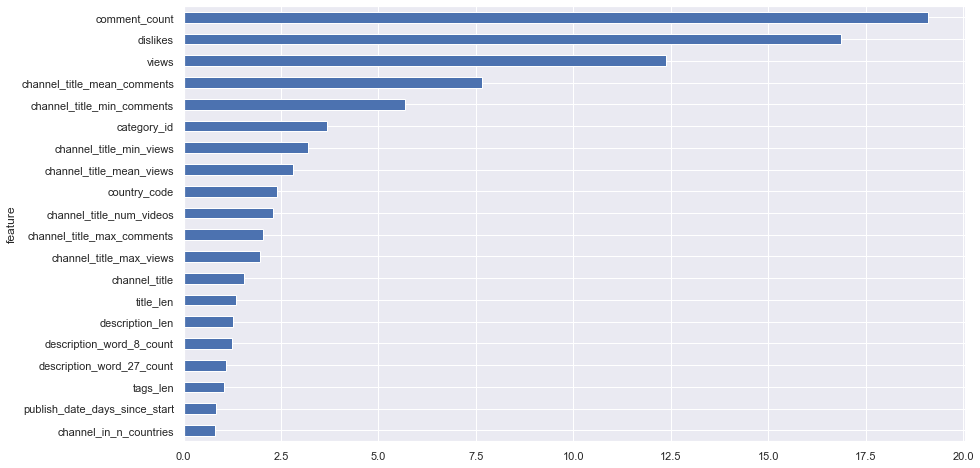

In [157]:
clf = CatBoostRegressor(n_estimators = 4000,
                       learning_rate = 0.06,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=4200,
                       )

fit_params = {'verbose': 300, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols) 



 -----------------Fold1-----------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's rmse: 0.558479	valid_0's l2: 0.311898
[400]	valid_0's rmse: 0.530619	valid_0's l2: 0.281557
[600]	valid_0's rmse: 0.517522	valid_0's l2: 0.267829
[800]	valid_0's rmse: 0.50972	valid_0's l2: 0.259815
[1000]	valid_0's rmse: 0.503623	valid_0's l2: 0.253636
[1200]	valid_0's rmse: 0.498652	valid_0's l2: 0.248654
[1400]	valid_0's rmse: 0.495666	valid_0's l2: 0.245685
[1600]	valid_0's rmse: 0.492761	valid_0's l2: 0.242814
[1800]	valid_0's rmse: 0.490866	valid_0's l2: 0.240949
[2000]	valid_0's rmse: 0.489079	valid_0's l2: 0.239198
[2200]	valid_0's rmse: 0.487463	valid_0's l2: 0.23762
[2400]	valid_0's rmse: 0.486211	valid_0's l2: 0.236401
[2600]	valid_0's rmse: 0.484811	valid_0's l2: 0.235042
[2800]	valid_0's rmse: 0.484056	valid_0's l2: 0.23431
[3000]	valid_0's rmse: 0.483289	valid_0's l2: 0.233568
[3200]	valid_0's rmse: 0.482508	valid_0's l2: 0.232814
[3400]	valid_0's rmse: 

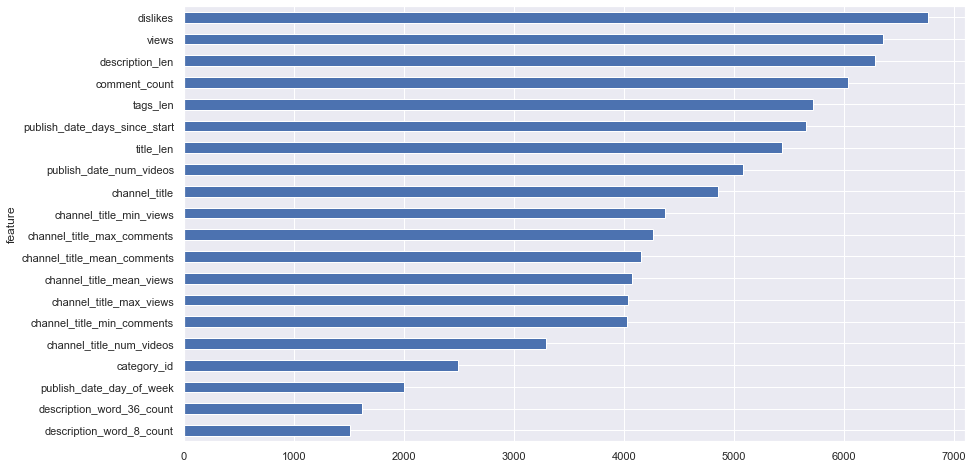

In [160]:
clf=LGBMRegressor(n_estimators=4000,
                 learning_rate=0.04,
                 colsample_bytree=0.65,
                 metric=None)
fit_params={'verbose':200,'early_stopping_rounds':200,'eval_metric':'rmse'}

lgb_oofs,lgb_preds,fi=run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)


 -----------------Fold1-----------------
[0]	validation_0-rmse:7.13609
[200]	validation_0-rmse:0.53019
[400]	validation_0-rmse:0.51020
[600]	validation_0-rmse:0.50187
[800]	validation_0-rmse:0.49624
[1000]	validation_0-rmse:0.49246
[1200]	validation_0-rmse:0.49003
[1400]	validation_0-rmse:0.48827
[1600]	validation_0-rmse:0.48711
[1800]	validation_0-rmse:0.48634
[2000]	validation_0-rmse:0.48522
[2200]	validation_0-rmse:0.48474
[2400]	validation_0-rmse:0.48434
[2600]	validation_0-rmse:0.48383
[2800]	validation_0-rmse:0.48359
[2999]	validation_0-rmse:0.48350

AV metric score for validation set is 483.4330800787614

 -----------------Fold2-----------------
[0]	validation_0-rmse:7.12404
[200]	validation_0-rmse:0.52376
[400]	validation_0-rmse:0.50271
[600]	validation_0-rmse:0.49461
[800]	validation_0-rmse:0.48981
[1000]	validation_0-rmse:0.48653
[1200]	validation_0-rmse:0.48466
[1400]	validation_0-rmse:0.48342
[1600]	validation_0-rmse:0.48237
[1800]	validation_0-rmse:0.48153
[2000]	validati

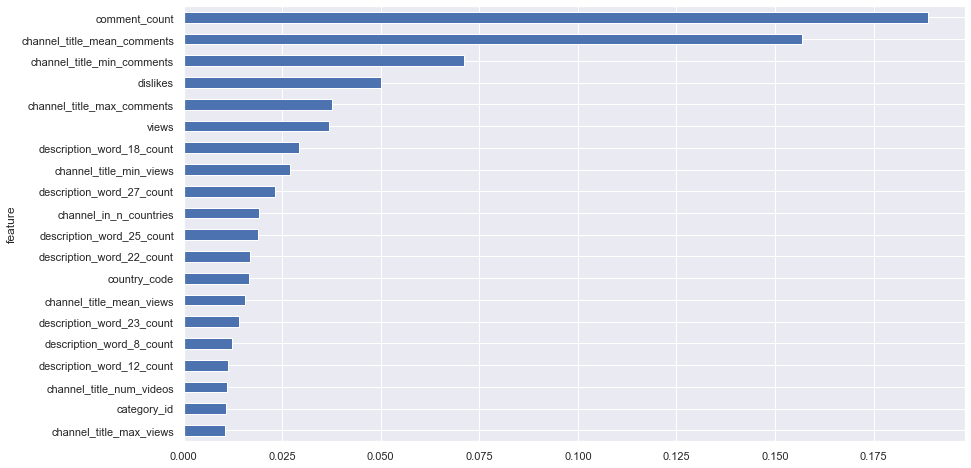

In [161]:
clf = XGBRegressor(n_estimators = 3000,
                    max_depth = 7,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=4200,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [165]:
av_metric(np.log1p(train[Target_col]), lgb_oofs * 0.8 + cb_oofs * 0.2)

474.7940306747401

### Ensemble

In [167]:
train_new = train[[ID_col, Target_col]]
train_new[Target_col] = np.log1p(train_new[Target_col])

test_new = test[[ID_col]]

train_new['lgb'] = lgb_oofs
test_new['lgb'] = lgb_preds

train_new['cb'] = cb_oofs
test_new['cb'] = cb_preds

train_new['xgb'] = xgb_oofs
test_new['xgb'] = xgb_preds

features = [c for c in train_new.columns if c not in [ID_col, Target_col]]


C:\Users\91999\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\91999\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\91999\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [168]:
clf = LinearRegression()

ens_oofs, ens_preds = run_clf_kfold(clf, train_new, test_new, features)


--------------Fold1-------------------

AV metric score for validation set is 474.6974868796108
--------------Fold2-------------------

AV metric score for validation set is 473.11074504503614
--------------Fold3-------------------

AV metric score for validation set is 465.0240254884295
--------------Fold4-------------------

AV metric score for validation set is 458.74136550186574
--------------Fold5-------------------

AV metric score for validation set is 474.4870690691978


 AV metric for oofs is 469.2550330545375


In [169]:
ens_preds_t=np.expm1(ens_preds)

In [170]:
ens_preds_t

array([ 697.99014176, 2308.42032702,   45.79152978, ..., 7545.80194324,
       5125.73212187, 3165.36577209])

In [171]:
ens_preds

array([6.54963664, 7.74475183, 3.8457022 , ..., 8.92887917, 8.54222372,
       8.06033977])

In [172]:
ss=pd.read_csv('sample_youtube.csv')

In [173]:
ss[Target_col]=ens_preds_t

In [174]:
ss.head()

,video_id,likes
0,87185,697.990142
1,9431,2308.420327
2,40599,45.791530
3,494,2820.208941
4,73942,541.002946


In [175]:
ss.to_csv('final_youtube_preds.csv',index=False)